# Tratando os dados do Uber

## 1. Importando as bibliotecas

In [113]:
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Importando os dados

In [114]:
df_trip = pd.read_csv('dados/uber/rider/trips_data.csv')

## 3. Verificando as informações disponíveis e tipos de dados

In [115]:
df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,799,UberX,COMPLETED,2021-07-16 16:50:28 +0000 UTC,2021-07-16 16:58:27 +0000 UTC,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31 +0000 UTC,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.83,7.97,BRL
1,799,UberX,COMPLETED,2021-07-16 15:47:28 +0000 UTC,2021-07-16 15:54:32 +0000 UTC,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46 +0000 UTC,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",0.78,8.92,BRL
2,799,UberX,COMPLETED,2021-07-15 17:56:40 +0000 UTC,2021-07-15 18:04:39 +0000 UTC,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23 +0000 UTC,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",11.99,24.05,BRL
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00 +0000 UTC,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL


In [116]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  58 non-null     int64  
 1   Product Type          49 non-null     object 
 2   Trip or Order Status  58 non-null     object 
 3   Request Time          58 non-null     object 
 4   Begin Trip Time       58 non-null     object 
 5   Begin Trip Lat        55 non-null     float64
 6   Begin Trip Lng        55 non-null     float64
 7   Begin Trip Address    55 non-null     object 
 8   Dropoff Time          58 non-null     object 
 9   Dropoff Lat           55 non-null     float64
 10  Dropoff Lng           55 non-null     float64
 11  Dropoff Address       57 non-null     object 
 12  Distance (miles)      58 non-null     float64
 13  Fare Amount           58 non-null     float64
 14  Fare Currency         58 non-null     object 
dtypes: float64(6), int64(1), 

## 4. Convertendo valores 

No nosso DataFrame todas as colunas que contém informações de datas estão com o timezone e em formato object.     
Não vou precisar do timezone.
>É necessário converter as colunas:    
>'Request Time', 'Begin Trip Time', 'Dropoff Time' do tipo object (string) -> para datetime

### 4.1. Começando pela coluna 'Request Time':

In [117]:
# Primeiro vou remover o timezone
df_trip['Request Time'] = df_trip['Request Time'].astype(str).str[:-9]

In [118]:
# Checando se deu certo
df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27 +0000 UTC,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31 +0000 UTC,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.83,7.97,BRL
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32 +0000 UTC,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46 +0000 UTC,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",0.78,8.92,BRL
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39 +0000 UTC,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23 +0000 UTC,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",11.99,24.05,BRL
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01 00:00:00 +0000 UTC,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00 +0000 UTC,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL


In [119]:
# Convertendo o tipo para datetime
df_trip['Request Time'] =  pd.to_datetime(df_trip['Request Time'])

In [120]:
# Verificando se houve alteração
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  58 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  58 non-null     object        
 3   Request Time          58 non-null     datetime64[ns]
 4   Begin Trip Time       58 non-null     object        
 5   Begin Trip Lat        55 non-null     float64       
 6   Begin Trip Lng        55 non-null     float64       
 7   Begin Trip Address    55 non-null     object        
 8   Dropoff Time          58 non-null     object        
 9   Dropoff Lat           55 non-null     float64       
 10  Dropoff Lng           55 non-null     float64       
 11  Dropoff Address       57 non-null     object        
 12  Distance (miles)      58 non-null     float64       
 13  Fare Amount           

### 4.2. Repetindo o processo na coluna 'Begin Trip Time':

In [121]:
# Removendo o timezone
df_trip['Begin Trip Time'] = df_trip['Begin Trip Time'].astype(str).str[:-9]

In [122]:
# Confirmando se a remoção deu certo
df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31 +0000 UTC,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.83,7.97,BRL
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46 +0000 UTC,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",0.78,8.92,BRL
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23 +0000 UTC,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",11.99,24.05,BRL
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01 00:00:00,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01 00:00:00,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00 +0000 UTC,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL


In [123]:
# Convertendo para datetime
df_trip['Begin Trip Time'] = pd.to_datetime(df_trip['Begin Trip Time'])

In [124]:
# Verificando se a conversão funcionou
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  58 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  58 non-null     object        
 3   Request Time          58 non-null     datetime64[ns]
 4   Begin Trip Time       58 non-null     datetime64[ns]
 5   Begin Trip Lat        55 non-null     float64       
 6   Begin Trip Lng        55 non-null     float64       
 7   Begin Trip Address    55 non-null     object        
 8   Dropoff Time          58 non-null     object        
 9   Dropoff Lat           55 non-null     float64       
 10  Dropoff Lng           55 non-null     float64       
 11  Dropoff Address       57 non-null     object        
 12  Distance (miles)      58 non-null     float64       
 13  Fare Amount           

### 4.3. E na coluna 'Dropoff Time':

In [125]:
# Removendo o timezone
df_trip['Dropoff Time'] = df_trip['Dropoff Time'].astype(str).str[:-9]

In [126]:
# Checando mais uma vez se funcionou
df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.83,7.97,BRL
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",0.78,8.92,BRL
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",11.99,24.05,BRL
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01 00:00:00,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01 00:00:00,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,0.00,BRL


In [127]:
# Removendo o timezone
df_trip['Dropoff Time'] = pd.to_datetime(df_trip['Dropoff Time'])

In [128]:
# Verificando se a alteração ocorreu
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  58 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  58 non-null     object        
 3   Request Time          58 non-null     datetime64[ns]
 4   Begin Trip Time       58 non-null     datetime64[ns]
 5   Begin Trip Lat        55 non-null     float64       
 6   Begin Trip Lng        55 non-null     float64       
 7   Begin Trip Address    55 non-null     object        
 8   Dropoff Time          58 non-null     datetime64[ns]
 9   Dropoff Lat           55 non-null     float64       
 10  Dropoff Lng           55 non-null     float64       
 11  Dropoff Address       57 non-null     object        
 12  Distance (miles)      58 non-null     float64       
 13  Fare Amount           

### 4.3. Agora vou converter a distância percorrida, de milhas, para kilômetros:

In [129]:
df_trip['Distance (km)'] = df_trip['Distance (miles)']/0.62137119

# Removendo a coluna com valores em milhas, pois não será mais necessária 
df_trip.drop('Distance (miles)', axis=1, inplace=True)

In [130]:
# Verificando as alterações
df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km)
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",7.97,BRL,1.335756
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",8.92,BRL,1.255288
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",24.05,BRL,19.296035
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01 00:00:00,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,BRL,0.000000
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01 00:00:00,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,BRL,0.000000


### 4.4. Criando algumas colunas de data e hora

In [131]:
# Dia da semana
df_trip['Day of Week'] = df_trip['Begin Trip Time'].dt.day_name()

# Dia do Mês
df_trip['Day of Month'] = df_trip['Begin Trip Time'].dt.day

# Hora do Dia
df_trip['Time of Day'] = df_trip['Begin Trip Time'].dt.hour

# Data
df_trip['Date'] = df_trip['Begin Trip Time'].dt.date

df_trip.head(5)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",7.97,BRL,1.335756,Friday,16,16,2021-07-16
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",8.92,BRL,1.255288,Friday,16,15,2021-07-16
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",24.05,BRL,19.296035,Thursday,15,18,2021-07-15
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01 00:00:00,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,BRL,0.000000,Thursday,1,0,1970-01-01
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01 00:00:00,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01 00:00:00,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,BRL,0.000000,Thursday,1,0,1970-01-01


### 4.5. Removendo dados que não vamos utilizar

In [132]:
# Filtrando os dados de corridas não realizadas
df_trip[(df_trip['Trip or Order Status']=='UNFULFILLED')]

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
3,799,NaN,UNFULFILLED,2021-07-15 17:52:13,1970-01-01,NaN,NaN,NaN,1970-01-01,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
4,799,NaN,UNFULFILLED,2021-07-15 17:44:36,1970-01-01,-8.122423,-34.905186,"R. Ten. Domingos de Brito, 169 - Boa Viagem, R...",1970-01-01,-8.123965,-34.905207,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
8,799,NaN,UNFULFILLED,2021-07-09 23:20:30,1970-01-01,-8.058941,-34.886097,"R. Gervásio Pires, 374 - Santo Amaro, Recife -...",1970-01-01,-8.058942,-34.886095,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
10,799,NaN,UNFULFILLED,2021-07-09 22:59:48,1970-01-01,NaN,NaN,NaN,1970-01-01,NaN,NaN,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
15,799,NaN,UNFULFILLED,2021-06-23 21:44:24,1970-01-01,-8.172574,-34.931805,"R. Calumbi, 756 - Cajueiro Seco, Jaboatão dos ...",1970-01-01,-8.171072,-34.929147,"R. Pio XII, 395A - Cajueiro Seco, Jaboatão dos...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
16,799,NaN,UNFULFILLED,2021-06-23 21:20:41,1970-01-01,-8.172906,-34.932630,"R. Renascença, 230 - Cajueiro Seco, Jaboatão d...",1970-01-01,-8.166592,-34.927121,"R. Santo Elías, 55 - Cajueiro Seco, Jaboatão d...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
17,799,NaN,UNFULFILLED,2021-06-23 21:16:24,1970-01-01,-8.169723,-34.924114,"Rua Frei Caneca, 30A - Cajueiro Seco, Jaboatão...",1970-01-01,-8.169702,-34.924111,"Rua Frei Caneca, 20 - Cajueiro Seco, Jaboatão ...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
18,799,NaN,UNFULFILLED,2021-06-23 21:04:21,1970-01-01,-8.159870,-34.928420,"Viela Mario Gouveia, 28 - Muribeca dos Guarara...",1970-01-01,-8.170901,-34.926520,"R. Santo André, 120 - Cajueiro Seco, Jaboatão ...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
20,799,NaN,UNFULFILLED,2021-06-23 20:56:36,1970-01-01,NaN,NaN,NaN,1970-01-01,NaN,NaN,NaN,0.0,BRL,0.0,Thursday,1,0,1970-01-01


In [133]:
df_trip[(df_trip['Trip or Order Status']=='CANCELED')]

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
19,799,Moto,CANCELED,2021-06-23 21:01:06,1970-01-01,-8.163970,-34.931780,"Av. Dr. Júlio Maranhão, 773 - Prazeres, Jaboat...",1970-01-01,-8.163962,-34.931790,"Av. Dr. Júlio Maranhão, 773 - Prazeres, Jaboat...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
46,799,UberX,CANCELED,2020-12-02 11:21:13,1970-01-01,-8.062099,-34.898987,"R. do Paissandú, 878 - Paissandu, Recife - PE,...",1970-01-01,-8.062333,-34.913478,"R. Carlos Gomes, 758 - Prado, Recife - PE, 507...",0.0,BRL,0.0,Thursday,1,0,1970-01-01
57,799,UberX,CANCELED,2020-10-23 01:44:07,1970-01-01,-8.099228,-35.020428,"Rua Alberto Barreto, 1198 - Santo Aleixo, Jabo...",1970-01-01,-8.098519,-35.020601,"R. Estr. da Luz, 2300 - Santo Aleixo, Jaboatão...",0.0,BRL,0.0,Thursday,1,0,1970-01-01


In [134]:
# Get names of indexes for which column Stock has value No
indexNames = df_trip[df_trip['Trip or Order Status'] == 'UNFULFILLED'].index

# Delete these row indexes from dataFrame
df_trip.drop(indexNames, inplace=True)

df_trip.head(20)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",7.97,BRL,1.335756,Friday,16,16,2021-07-16
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",8.92,BRL,1.255288,Friday,16,15,2021-07-16
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",24.05,BRL,19.296035,Thursday,15,18,2021-07-15
5,799,UberX,COMPLETED,2021-07-15 16:24:04,2021-07-15 16:47:07,-8.059806,-34.889490,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",2021-07-15 17:05:45,-8.121375,-34.897583,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",16.93,BRL,9.511223,Thursday,15,16,2021-07-15
6,799,UberX,COMPLETED,2021-07-15 15:26:06,2021-07-15 15:43:13,-8.104401,-35.015285,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",2021-07-15 16:18:16,-8.059794,-34.889545,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",18.01,BRL,18.507456,Thursday,15,15,2021-07-15
7,799,UberX,COMPLETED,2021-07-09 23:25:23,2021-07-09 23:41:12,-8.059838,-34.889430,"R. Do Progresso, 47 - Boa Vista - Recife - PE,...",2021-07-10 00:05:27,-8.104434,-35.015575,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",30.54,BRL,22.707844,Friday,9,23,2021-07-09
9,799,UberX,DRIVER_CANCELED,2021-07-09 23:09:31,1970-01-01 00:00:00,-8.059271,-34.891376,"Av. Manoel Borba, 685 - Boa Vista, Recife - PE...",1970-01-01 00:00:00,-8.059372,-34.888815,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",3.00,BRL,0.000000,Thursday,1,0,1970-01-01
11,799,UberX,DRIVER_CANCELED,2021-07-09 22:54:12,1970-01-01 00:00:00,-8.067717,-34.883186,"R. Floriano Peixoto, 308 - São José, Recife - ...",1970-01-01 00:00:00,-8.070754,-34.885343,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",0.00,BRL,0.000000,Thursday,1,0,1970-01-01
12,799,UberX,COMPLETED,2021-07-09 21:19:31,2021-07-09 21:33:36,-8.104385,-35.015633,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-09 22:09:58,-8.059852,-34.889507,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",23.78,BRL,18.636204,Friday,9,21,2021-07-09
13,799,UberX,COMPLETED,2021-07-04 16:53:18,2021-07-04 16:57:59,-8.059901,-34.889362,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",2021-07-04 17:24:13,-8.104406,-35.015633,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",21.07,BRL,18.072933,Sunday,4,16,2021-07-04


In [135]:
df_trip[(df_trip['Trip or Order Status']=='COMPLETED')]

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",7.97,BRL,1.335756,Friday,16,16,2021-07-16
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...",8.92,BRL,1.255288,Friday,16,15,2021-07-16
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",24.05,BRL,19.296035,Thursday,15,18,2021-07-15
5,799,UberX,COMPLETED,2021-07-15 16:24:04,2021-07-15 16:47:07,-8.059806,-34.889490,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",2021-07-15 17:05:45,-8.121375,-34.897583,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",16.93,BRL,9.511223,Thursday,15,16,2021-07-15
6,799,UberX,COMPLETED,2021-07-15 15:26:06,2021-07-15 15:43:13,-8.104401,-35.015285,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",2021-07-15 16:18:16,-8.059794,-34.889545,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",18.01,BRL,18.507456,Thursday,15,15,2021-07-15
7,799,UberX,COMPLETED,2021-07-09 23:25:23,2021-07-09 23:41:12,-8.059838,-34.889430,"R. Do Progresso, 47 - Boa Vista - Recife - PE,...",2021-07-10 00:05:27,-8.104434,-35.015575,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",30.54,BRL,22.707844,Friday,9,23,2021-07-09
12,799,UberX,COMPLETED,2021-07-09 21:19:31,2021-07-09 21:33:36,-8.104385,-35.015633,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-09 22:09:58,-8.059852,-34.889507,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",23.78,BRL,18.636204,Friday,9,21,2021-07-09
13,799,UberX,COMPLETED,2021-07-04 16:53:18,2021-07-04 16:57:59,-8.059901,-34.889362,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",2021-07-04 17:24:13,-8.104406,-35.015633,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",21.07,BRL,18.072933,Sunday,4,16,2021-07-04
14,799,UberX,COMPLETED,2021-07-04 14:36:07,2021-07-04 14:50:38,-8.104417,-35.015663,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",2021-07-04 15:20:00,-8.059929,-34.889450,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",39.51,BRL,18.507456,Sunday,4,14,2021-07-04
21,799,UberX,COMPLETED,2021-06-22 18:27:01,2021-06-22 18:39:51,-8.055030,-34.898740,"R. da Baixa Verde, 313 - Derby, Recife - PE, 5...",2021-06-22 19:37:44,-8.104420,-35.015680,"R. Luiz Câmara de Albuquerque, 213 - Santo Ale...",28.91,BRL,20.808818,Tuesday,22,18,2021-06-22


### 4.6. Alterando caracter na coluna "Fare Amount", de ponto para vírgula

In [136]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  49 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  49 non-null     object        
 3   Request Time          49 non-null     datetime64[ns]
 4   Begin Trip Time       49 non-null     datetime64[ns]
 5   Begin Trip Lat        49 non-null     float64       
 6   Begin Trip Lng        49 non-null     float64       
 7   Begin Trip Address    49 non-null     object        
 8   Dropoff Time          49 non-null     datetime64[ns]
 9   Dropoff Lat           49 non-null     float64       
 10  Dropoff Lng           49 non-null     float64       
 11  Dropoff Address       49 non-null     object        
 12  Fare Amount           49 non-null     float64       
 13  Fare Currency         

In [137]:
df_trip['Fare Amount'] = df_trip['Fare Amount'].astype(str)

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  49 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  49 non-null     object        
 3   Request Time          49 non-null     datetime64[ns]
 4   Begin Trip Time       49 non-null     datetime64[ns]
 5   Begin Trip Lat        49 non-null     float64       
 6   Begin Trip Lng        49 non-null     float64       
 7   Begin Trip Address    49 non-null     object        
 8   Dropoff Time          49 non-null     datetime64[ns]
 9   Dropoff Lat           49 non-null     float64       
 10  Dropoff Lng           49 non-null     float64       
 11  Dropoff Address       49 non-null     object        
 12  Fare Amount           49 non-null     object        
 13  Fare Currency         

In [138]:
df_trip['Fare Amount'] = df_trip['Fare Amount'].str.replace('.',',')

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  49 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  49 non-null     object        
 3   Request Time          49 non-null     datetime64[ns]
 4   Begin Trip Time       49 non-null     datetime64[ns]
 5   Begin Trip Lat        49 non-null     float64       
 6   Begin Trip Lng        49 non-null     float64       
 7   Begin Trip Address    49 non-null     object        
 8   Dropoff Time          49 non-null     datetime64[ns]
 9   Dropoff Lat           49 non-null     float64       
 10  Dropoff Lng           49 non-null     float64       
 11  Dropoff Address       49 non-null     object        
 12  Fare Amount           49 non-null     object        
 13  Fare Currency         

/tmp/ipykernel_7060/2096207835.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_trip['Fare Amount'] = df_trip['Fare Amount'].str.replace('.',',')


### 4.7. Alterando caracter na coluna "Distance (km)", de ponto para vírgula

In [139]:
df_trip['Distance (km)'] = df_trip['Distance (km)'].astype(str)

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  49 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  49 non-null     object        
 3   Request Time          49 non-null     datetime64[ns]
 4   Begin Trip Time       49 non-null     datetime64[ns]
 5   Begin Trip Lat        49 non-null     float64       
 6   Begin Trip Lng        49 non-null     float64       
 7   Begin Trip Address    49 non-null     object        
 8   Dropoff Time          49 non-null     datetime64[ns]
 9   Dropoff Lat           49 non-null     float64       
 10  Dropoff Lng           49 non-null     float64       
 11  Dropoff Address       49 non-null     object        
 12  Fare Amount           49 non-null     object        
 13  Fare Currency         

In [140]:
df_trip['Distance (km)'] = df_trip['Distance (km)'].str.replace('.',',')

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 57
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  49 non-null     int64         
 1   Product Type          49 non-null     object        
 2   Trip or Order Status  49 non-null     object        
 3   Request Time          49 non-null     datetime64[ns]
 4   Begin Trip Time       49 non-null     datetime64[ns]
 5   Begin Trip Lat        49 non-null     float64       
 6   Begin Trip Lng        49 non-null     float64       
 7   Begin Trip Address    49 non-null     object        
 8   Dropoff Time          49 non-null     datetime64[ns]
 9   Dropoff Lat           49 non-null     float64       
 10  Dropoff Lng           49 non-null     float64       
 11  Dropoff Address       49 non-null     object        
 12  Fare Amount           49 non-null     object        
 13  Fare Currency         

/tmp/ipykernel_7060/1407288168.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_trip['Distance (km)'] = df_trip['Distance (km)'].str.replace('.',',')


In [141]:
df_trip.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Fare Amount,Fare Currency,Distance (km),Day of Week,Day of Month,Time of Day,Date
0,799,UberX,COMPLETED,2021-07-16 16:50:28,2021-07-16 16:58:27,-8.111934,-35.017975,"Praça Nossa Sra. do Rosário, 472 - Centro, Jab...",2021-07-16 17:03:31,-8.104444,-35.015660,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...","7,97",BRL,"1,3357555248095747",Friday,16,16,2021-07-16
1,799,UberX,COMPLETED,2021-07-16 15:47:28,2021-07-16 15:54:32,-8.104412,-35.015440,"R. Luiz Câmara de Albuquerque, 215 - Santo Ale...",2021-07-16 15:59:46,-8.112445,-35.017555,"Centro, Jaboatão dos Guararapes - PE, 54110-24...","8,92",BRL,"1,2552883245198414",Friday,16,15,2021-07-16
2,799,UberX,COMPLETED,2021-07-15 17:56:40,2021-07-15 18:04:39,-8.121448,-34.897648,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...",2021-07-15 19:04:23,-8.104414,-35.015620,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...","24,05",BRL,"19,296034629478076",Thursday,15,18,2021-07-15
5,799,UberX,COMPLETED,2021-07-15 16:24:04,2021-07-15 16:47:07,-8.059806,-34.889490,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...",2021-07-15 17:05:45,-8.121375,-34.897583,"Av. Conselheiro Aguiar, 3763 - Boa Viagem, Rec...","16,93",BRL,"9,511223074246491",Thursday,15,16,2021-07-15
6,799,UberX,COMPLETED,2021-07-15 15:26:06,2021-07-15 15:43:13,-8.104401,-35.015285,"R. Luiz Câmara de Albuquerque, 2 - Santo Aleix...",2021-07-15 16:18:16,-8.059794,-34.889545,"Av. Manoel Borba, 454 - Boa Vista, Recife - PE...","18,01",BRL,"18,50745606663869",Thursday,15,15,2021-07-15


## 5. Salvando os dados tratados

In [142]:
#df_trip.to_csv('./dados_tratados/uber/trips_data.csv', index = None)

## 6. Plotando alguns gráficos

Text(0.5, 1.0, 'Trips Frequency by Day of the Week')

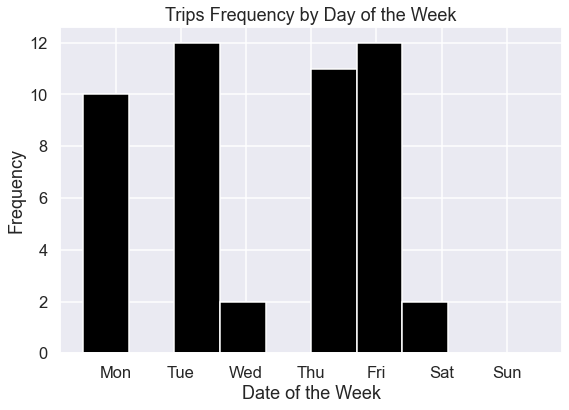

In [144]:
# Gráfico com a frequência de corridas por dia do mês
fig = plt.figure(figsize=(9,6))

hist(df_trip['Day of Week'], range =(-.5,6.5), color='black')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('Date of the Week')
ylabel('Frequency')
title('Trips Frequency by Day of the Week')

## Fim